## **Primera Parte Clasificador de Sentimientos**

In [1]:
# Importacion de librerias
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud as wc
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize, sent_tokenize
import re
from nltk.stem import WordNetLemmatizer

# Descarga de paquetes necesarios
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
eng_stopwords = set(stopwords.words('english'))

# Definimos las fucniones necesarias para el preprocesamiento de texto
def generate_wordcloud(text):
    wordcloud = wc(relative_scaling = 1.0, stopwords = eng_stopwords).generate(text)
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.margins(x=0, y=0)
    plt.show()
# Funcion para eliminar puntuacion
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
# Funcion para tokenizar texto
def remove_stopwords(words, stopwords):
    wordsFiltered = []
    for w in words:
        if w not in stopwords:
            wordsFiltered.append(w)
    return wordsFiltered
# Funcion para lematizar texto
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Cargamos el dataset
cov_text_df = pd.read_csv('Corona_NLP_test.csv')
display(cov_text_df.head())

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [3]:
# Verificamos la informacion del dataset
cov_text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [4]:
# Eliminamos las columnas que no necesitamos
cov_text_df = cov_text_df.iloc[:, 4:]
cov_text_df.head(5)

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [5]:
# Eliminamos los valores nulos
for text in cov_text_df.OriginalTweet.head():
    print("tweet: ", text, '\n')

tweet:  TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1 

tweet:  When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY 

tweet:  Find out how you can protect yourself and loved ones from #coronavirus. ? 

tweet:  #Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?

https://t.co/IASiReGPC4

#QAnon #QAnon2018 #QAnon2020 
#Election2020 #CDC https://t.co/29isZOewxu 

tweet:  #toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News  #Corvid19 #7NewsMelb #dunnypapergate #Costco    O

In [6]:
# Eliminamos los valores nulos
cov_text_df["num_word"] = cov_text_df['OriginalTweet'].apply(lambda x: len(str(x).split()))

print('numero maximo de palabras en un tweet: ', cov_text_df['num_word'].max())
print('numero minimo de palabras en un tweet: ', cov_text_df['num_word'].min())

numero maximo de palabras en un tweet:  62
numero minimo de palabras en un tweet:  2


In [7]:
# Eliminamos los valores nulos
cov_text_df["num_unique_word"] = cov_text_df['OriginalTweet'].apply(lambda x: len(set(str(x).split())))

print('numero maximo de palabras unicas en un tweet: ', cov_text_df['num_unique_word'].max())
print('numero minimo de palabras unicas en un tweet: ', cov_text_df['num_unique_word'].min())

numero maximo de palabras unicas en un tweet:  52
numero minimo de palabras unicas en un tweet:  2


In [8]:
# Eliminamos los valores nulos
cov_text_df["num_char"] = cov_text_df['OriginalTweet'].apply(lambda x: len(str(x)))

print('numero maximo de caracteres en un tweet: ', cov_text_df['num_char'].max())

numero maximo de caracteres en un tweet:  342


In [9]:
# Eliminamos los valores nulos
cov_text_df["num_punctuation"] = cov_text_df['OriginalTweet'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

print('numero maximo de puntuaciones en un tweet: ', cov_text_df['num_punctuation'].max())

numero maximo de puntuaciones en un tweet:  44


In [10]:
# Verificamos la distribucion de las clases
np.unique(cov_text_df['Sentiment'])

array(['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral',
       'Positive'], dtype=object)

In [11]:
# Creamos un diccionario para mapear las etiquetas de sentimiento
labels_dict = {
    'Extremely Negative': 0,
    'Negative': 1,
    'Neutral': 2,
    'Positive': 3,
    'Extremely Positive': 4
    }

In [12]:
# Mapeamos las etiquetas de sentimiento
for index in range(len(cov_text_df)):
    key = cov_text_df.iloc[index]['Sentiment']
    cov_text_df.at[index, 'Sentiment_hot'] = labels_dict[key]

cov_text_df.head()

,OriginalTweet,Sentiment,num_word,num_unique_word,num_char,num_punctuation,Sentiment_hot
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,23,23,228,21,0.0
1,When I couldn't find hand sanitizer at Fred Me...,Positive,30,29,193,17,3.0
2,Find out how you can protect yourself and love...,Extremely Positive,13,13,73,3,4.0
3,#Panic buying hits #NewYork City as anxious sh...,Negative,37,37,318,24,1.0
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,26,24,252,18,2.0


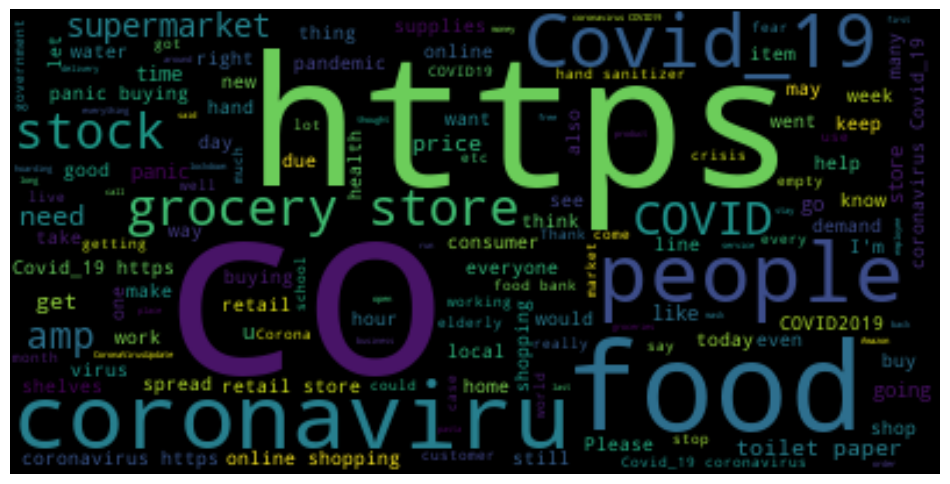

In [13]:
# Generamos la nube de palabras
text = ' '.join(cov_text_df['OriginalTweet'])
generate_wordcloud(text)

<Axes: xlabel='Sentiment_hot', ylabel='num_word'>

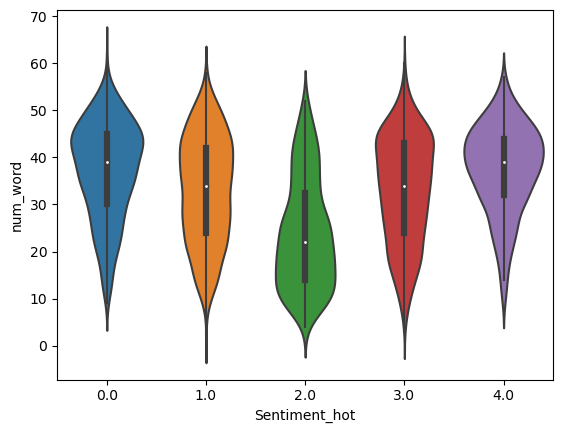

In [14]:
# Hacemos un violin plot para ver la distribucion de la cantidad de palabras por sentimiento
sns.violinplot(data = cov_text_df, x = 'Sentiment_hot', y = 'num_word')

In [15]:
# Mostremos el tweet con mas palabras
main_text = cov_text_df.OriginalTweet[35]
print(main_text)

Remember, with all the media deflection stories about bog rolls, panic-buying, food shortages, Covid-19, Irish bridges etc etc.

We've still got Brexit, Austerity, poverty, a crashing economy &amp; the worst UK Govt in living memory. 

All depressing stuff &amp; it aint gonna end well.


In [16]:
# Removemos la puntuacion
cov_text_df['TweetPunct'] = cov_text_df['OriginalTweet'].apply(lambda x: remove_punct(x))
cov_text_df.head()

,OriginalTweet,Sentiment,num_word,num_unique_word,num_char,num_punctuation,Sentiment_hot,TweetPunct
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,23,23,228,21,0.0,TRENDING New Yorkers encounter empty supermark...
1,When I couldn't find hand sanitizer at Fred Me...,Positive,30,29,193,17,3.0,When I couldnt find hand sanitizer at Fred Mey...
2,Find out how you can protect yourself and love...,Extremely Positive,13,13,73,3,4.0,Find out how you can protect yourself and love...
3,#Panic buying hits #NewYork City as anxious sh...,Negative,37,37,318,24,1.0,Panic buying hits NewYork City as anxious shop...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,26,24,252,18,2.0,toiletpaper dunnypaper coronavirus coronavirus...


In [17]:
# Tokenizamos el texto
main_text = cov_text_df.TweetPunct[35]
words = word_tokenize(main_text)
print(words)

['Remember', 'with', 'all', 'the', 'media', 'deflection', 'stories', 'about', 'bog', 'rolls', 'panicbuying', 'food', 'shortages', 'Covid', 'Irish', 'bridges', 'etc', 'etc', 'Weve', 'still', 'got', 'Brexit', 'Austerity', 'poverty', 'a', 'crashing', 'economy', 'amp', 'the', 'worst', 'UK', 'Govt', 'in', 'living', 'memory', 'All', 'depressing', 'stuff', 'amp', 'it', 'aint', 'gon', 'na', 'end', 'well']


In [18]:
ocv_text_df['TweetToken'] = cov_text_df['TweetPunct'].apply(lambda x: word_tokenize(x.lower()))
cov_text_df.head()

,OriginalTweet,Sentiment,num_word,num_unique_word,num_char,num_punctuation,Sentiment_hot,TweetPunct,TweetToken
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,23,23,228,21,0.0,TRENDING New Yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup..."
1,When I couldn't find hand sanitizer at Fred Me...,Positive,30,29,193,17,3.0,When I couldnt find hand sanitizer at Fred Mey...,"[when, i, couldnt, find, hand, sanitizer, at, ..."
2,Find out how you can protect yourself and love...,Extremely Positive,13,13,73,3,4.0,Find out how you can protect yourself and love...,"[find, out, how, you, can, protect, yourself, ..."
3,#Panic buying hits #NewYork City as anxious sh...,Negative,37,37,318,24,1.0,Panic buying hits NewYork City as anxious shop...,"[panic, buying, hits, newyork, city, as, anxio..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,26,24,252,18,2.0,toiletpaper dunnypaper coronavirus coronavirus...,"[toiletpaper, dunnypaper, coronavirus, coronav..."


In [19]:
# Removemos las stopwords
stopWords = set(stopwords.words('english'))
wrodFiltered = []

for w in words:
    if w not in stopWords:
        wrodFiltered.append(w)
print(wrodFiltered)

['Remember', 'media', 'deflection', 'stories', 'bog', 'rolls', 'panicbuying', 'food', 'shortages', 'Covid', 'Irish', 'bridges', 'etc', 'etc', 'Weve', 'still', 'got', 'Brexit', 'Austerity', 'poverty', 'crashing', 'economy', 'amp', 'worst', 'UK', 'Govt', 'living', 'memory', 'All', 'depressing', 'stuff', 'amp', 'aint', 'gon', 'na', 'end', 'well']


In [20]:
cov_text_df['TweetNonStop'] = cov_text_df['TweetToken'].apply(lambda x: remove_stopwords(x, stopWords))
cov_text_df.head()

,OriginalTweet,Sentiment,num_word,num_unique_word,num_char,num_punctuation,Sentiment_hot,TweetPunct,TweetToken,TweetNonStop
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,23,23,228,21,0.0,TRENDING New Yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup...","[trending, new, yorkers, encounter, empty, sup..."
1,When I couldn't find hand sanitizer at Fred Me...,Positive,30,29,193,17,3.0,When I couldnt find hand sanitizer at Fred Mey...,"[when, i, couldnt, find, hand, sanitizer, at, ...","[couldnt, find, hand, sanitizer, fred, meyer, ..."
2,Find out how you can protect yourself and love...,Extremely Positive,13,13,73,3,4.0,Find out how you can protect yourself and love...,"[find, out, how, you, can, protect, yourself, ...","[find, protect, loved, ones, coronavirus]"
3,#Panic buying hits #NewYork City as anxious sh...,Negative,37,37,318,24,1.0,Panic buying hits NewYork City as anxious shop...,"[panic, buying, hits, newyork, city, as, anxio...","[panic, buying, hits, newyork, city, anxious, ..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,26,24,252,18,2.0,toiletpaper dunnypaper coronavirus coronavirus...,"[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpaper, dunnypaper, coronavirus, coronav..."


In [21]:
# Lematizamos el texto
wn = WordNetLemmatizer()

for word in main_text:
    print(wn.lemmatize(word))

R
e
m
e
m
b
e
r
 
w
i
t
h
 
a
l
l
 
t
h
e
 
m
e
d
i
a
 
d
e
f
l
e
c
t
i
o
n
 
s
t
o
r
i
e
s
 
a
b
o
u
t
 
b
o
g
 
r
o
l
l
s
 
p
a
n
i
c
b
u
y
i
n
g
 
f
o
o
d
 
s
h
o
r
t
a
g
e
s
 
C
o
v
i
d
 
I
r
i
s
h
 
b
r
i
d
g
e
s
 
e
t
c
 
e
t
c








W
e
v
e
 
s
t
i
l
l
 
g
o
t
 
B
r
e
x
i
t
 
A
u
s
t
e
r
i
t
y
 
p
o
v
e
r
t
y
 
a
 
c
r
a
s
h
i
n
g
 
e
c
o
n
o
m
y
 
a
m
p
 
t
h
e
 
w
o
r
s
t
 
U
K
 
G
o
v
t
 
i
n
 
l
i
v
i
n
g
 
m
e
m
o
r
y
 








A
l
l
 
d
e
p
r
e
s
s
i
n
g
 
s
t
u
f
f
 
a
m
p
 
i
t
 
a
i
n
t
 
g
o
n
n
a
 
e
n
d
 
w
e
l
l


In [22]:
cov_text_df['TweetLemmatized'] = cov_text_df['TweetNonStop'].apply(lambda x: lemmatizer(x))
cov_text_df.head()

,OriginalTweet,Sentiment,num_word,num_unique_word,num_char,num_punctuation,Sentiment_hot,TweetPunct,TweetToken,TweetNonStop,TweetLemmatized
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,23,23,228,21,0.0,TRENDING New Yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup...","[trending, new, yorkers, encounter, empty, sup...","[trending, new, yorkers, encounter, empty, sup..."
1,When I couldn't find hand sanitizer at Fred Me...,Positive,30,29,193,17,3.0,When I couldnt find hand sanitizer at Fred Mey...,"[when, i, couldnt, find, hand, sanitizer, at, ...","[couldnt, find, hand, sanitizer, fred, meyer, ...","[couldnt, find, hand, sanitizer, fred, meyer, ..."
2,Find out how you can protect yourself and love...,Extremely Positive,13,13,73,3,4.0,Find out how you can protect yourself and love...,"[find, out, how, you, can, protect, yourself, ...","[find, protect, loved, ones, coronavirus]","[find, protect, loved, one, coronavirus]"
3,#Panic buying hits #NewYork City as anxious sh...,Negative,37,37,318,24,1.0,Panic buying hits NewYork City as anxious shop...,"[panic, buying, hits, newyork, city, as, anxio...","[panic, buying, hits, newyork, city, anxious, ...","[panic, buying, hit, newyork, city, anxious, s..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,26,24,252,18,2.0,toiletpaper dunnypaper coronavirus coronavirus...,"[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpaper, dunnypaper, coronavirus, coronav..."


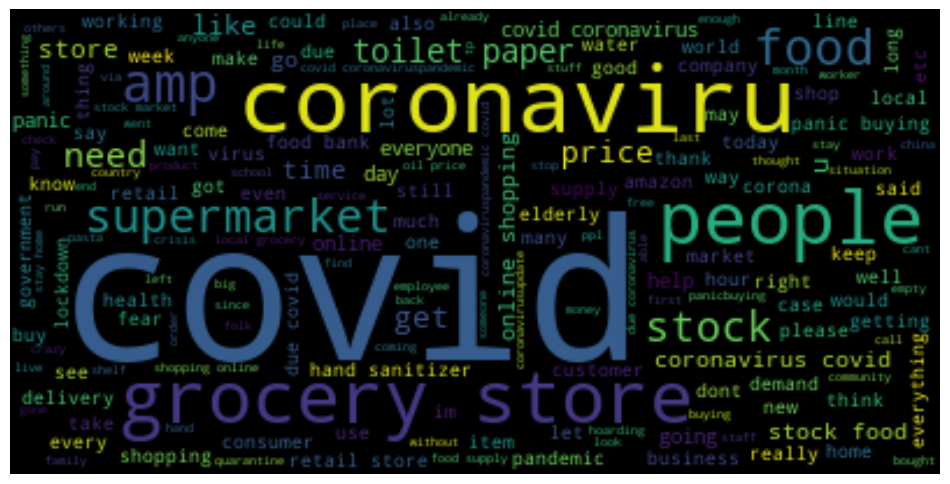

In [23]:
# Generamos la nube de palabras
text = " ".join(sum(cov_text_df['TweetLemmatized'], []))
generate_wordcloud(text)

Extremely Negative


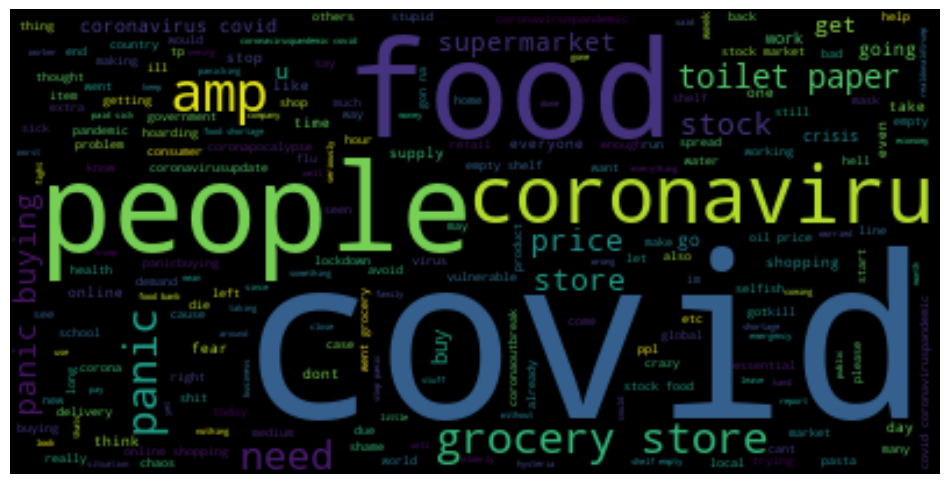

Negative


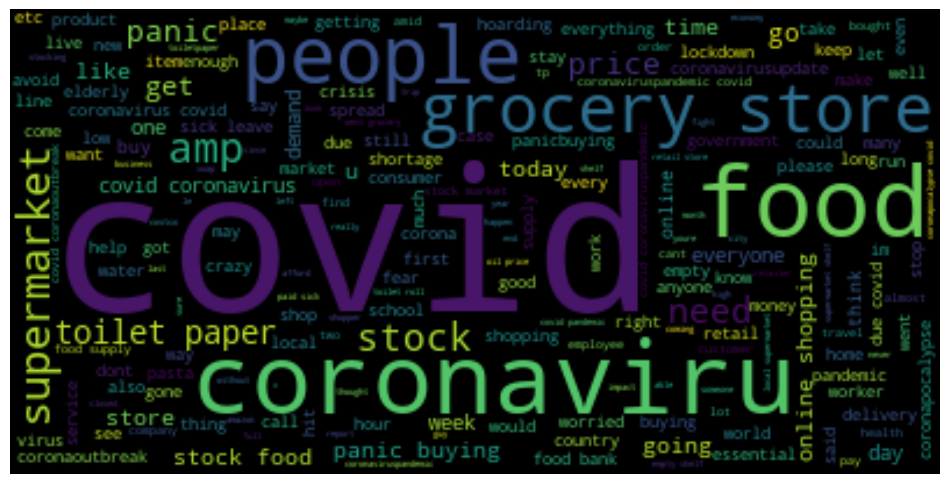

Neutral


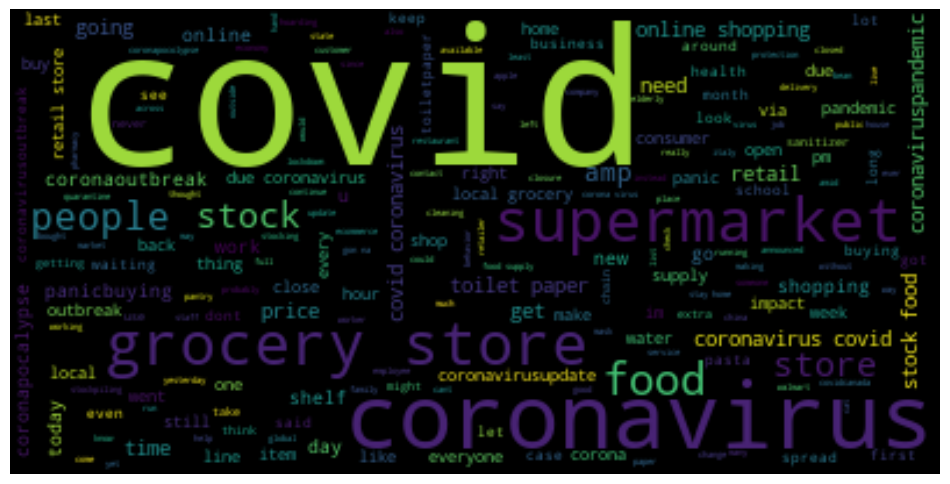

Positive


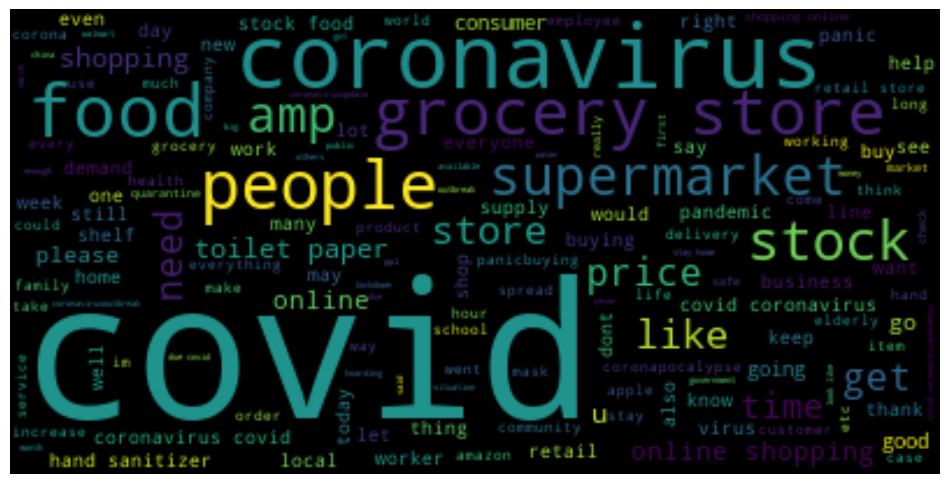

Extremely Positive


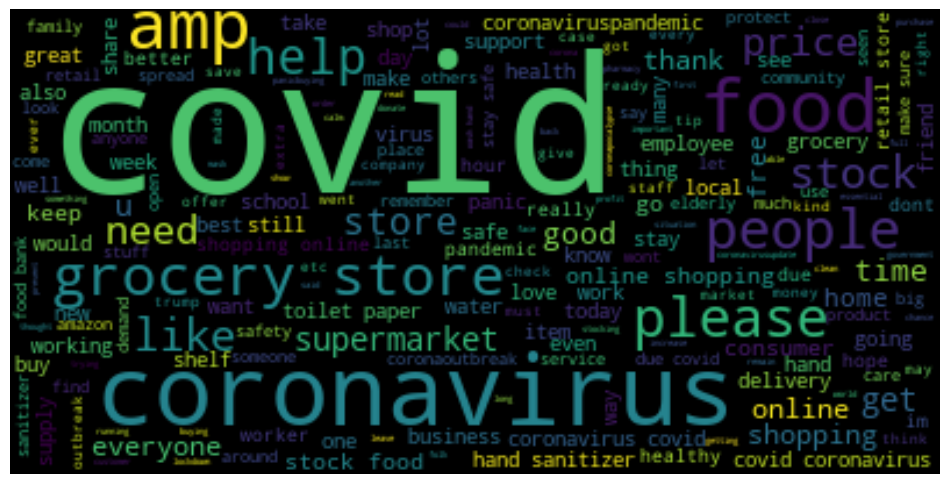

In [24]:
# Generamos la nube de palabras por sentimiento
for key in labels_dict.keys():
    print(key)
    text = " ".join(sum(cov_text_df[cov_text_df['Sentiment'] == key]['TweetLemmatized'], []))
    generate_wordcloud(text)

# Segunda parte Clasificador de sentimientos

In [25]:
from gensim import corpora
my_dict = corpora.Dictionary(cov_text_df['TweetLemmatized'])

# Verificamos el diccionario y la cantidad de palabras unicas
print("total unique words: ")
print(len(my_dict.token2id))

print("\nsample data from dictionary: ")
i = 0

for key in my_dict.token2id.keys():
    print("word: {} - id: {}".format(key, my_dict.token2id[key]))
    if i == 3:
        break  
    i += 1

total unique words: 
13025

sample data from dictionary: 
word: brooklyn - id: 0
word: coronavirusfearing - id: 1
word: empty - id: 2
word: encounter - id: 3


In [28]:
from gensim.models import TfidfModel
# Aplicamos el modelo TF-IDF
main_text = cov_text_df['TweetLemmatized'][35]
my_dict.doc2bow(main_text)

[(66, 1),
 (94, 1),
 (100, 2),
 (125, 1),
 (191, 1),
 (200, 1),
 (385, 1),
 (431, 1),
 (514, 1),
 (518, 1),
 (519, 1),
 (533, 1),
 (539, 1),
 (540, 1),
 (541, 1),
 (542, 1),
 (543, 1),
 (544, 1),
 (545, 1),
 (546, 2),
 (547, 1),
 (548, 1),
 (549, 1),
 (550, 1),
 (551, 1),
 (552, 1),
 (553, 1),
 (554, 1),
 (555, 1),
 (556, 1),
 (557, 1),
 (558, 1),
 (559, 1),
 (560, 1)]

In [27]:
# Creamos el corpus
cov_text_df['corpus'] = cov_text_df['TweetLemmatized'].apply(lambda x: my_dict.doc2bow(x))
cov_text_df.head()


,OriginalTweet,Sentiment,num_word,num_unique_word,num_char,num_punctuation,Sentiment_hot,TweetPunct,TweetToken,TweetNonStop,TweetLemmatized,corpus
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,23,23,228,21,0.0,TRENDING New Yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup...","[trending, new, yorkers, encounter, empty, sup...","[trending, new, yorkers, encounter, empty, sup...","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1..."
1,When I couldn't find hand sanitizer at Fred Me...,Positive,30,29,193,17,3.0,When I couldnt find hand sanitizer at Fred Mey...,"[when, i, couldnt, find, hand, sanitizer, at, ...","[couldnt, find, hand, sanitizer, fred, meyer, ...","[couldnt, find, hand, sanitizer, fred, meyer, ...","[(20, 1), (21, 1), (22, 1), (23, 1), (24, 1), ..."
2,Find out how you can protect yourself and love...,Extremely Positive,13,13,73,3,4.0,Find out how you can protect yourself and love...,"[find, out, how, you, can, protect, yourself, ...","[find, protect, loved, ones, coronavirus]","[find, protect, loved, one, coronavirus]","[(22, 1), (25, 1), (35, 1), (36, 1), (37, 1)]"
3,#Panic buying hits #NewYork City as anxious sh...,Negative,37,37,318,24,1.0,Panic buying hits NewYork City as anxious shop...,"[panic, buying, hits, newyork, city, as, anxio...","[panic, buying, hits, newyork, city, anxious, ...","[panic, buying, hit, newyork, city, anxious, s...","[(13, 1), (15, 1), (22, 1), (38, 1), (39, 1), ..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,26,24,252,18,2.0,toiletpaper dunnypaper coronavirus coronavirus...,"[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpaper, dunnypaper, coronavirus, coronav...","[(22, 1), (36, 1), (42, 2), (61, 1), (62, 1), ..."


In [29]:
# Aplicamos el modelo TF-IDF
tfidf_model = TfidfModel(cov_text_df['corpus'].to_list())
tfidf_model[cov_text_df.corpus[35]]

[(66, 0.012423809010707252),
 (94, 0.1338817964128143),
 (100, 0.13983597038555867),
 (125, 0.16603184971976692),
 (191, 0.0366615798460057),
 (200, 0.13215623253112269),
 (385, 0.13764709833941313),
 (431, 0.10504736264011318),
 (514, 0.1338817964128143),
 (518, 0.11763697092276443),
 (519, 0.16442432675660798),
 (533, 0.20787055195634596),
 (539, 0.19732557033072964),
 (540, 0.2583100574103834),
 (541, 0.17792498874417698),
 (542, 0.2365869448105144),
 (543, 0.19732557033072964),
 (544, 0.2583100574103834),
 (545, 0.2583100574103834),
 (546, 0.24435189549504926),
 (547, 0.14043469714728926),
 (548, 0.21486383221064542),
 (549, 0.14117213886112506),
 (550, 0.2365869448105144),
 (551, 0.13052074006425948),
 (552, 0.2021566259407788),
 (553, 0.11907813640808443),
 (554, 0.13160153085003132),
 (555, 0.10699154104827106),
 (556, 0.15871040074104084),
 (557, 0.14514451536505926),
 (558, 0.11336421039251729),
 (559, 0.16951764186212184),
 (560, 0.16772630707104322)]

In [32]:
from gensim.matutils import corpus2csc
# Convertimos el corpus a una matriz
tf_idf = pd.DataFrame(corpus2csc(tfidf_model[cov_text_df['corpus'].to_list()], num_terms=len(my_dict.token2id)).toarray().T)
tf_idf

,0,1,2,3,4,5,6,7,8,9,...,13015,13016,13017,13018,13019,13020,13021,13022,13023,13024
0,0.229625,0.293409,0.120685,0.2543,0.293409,0.208048,0.293409,0.293409,0.293409,0.132441,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3794,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3795,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3796,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.261817,0.261817,0.261817,0.261817,0.261817,0.261817,0.000000,0.000000,0.000000,0.000000


In [34]:
from sklearn.tree import DecisionTreeClassifier
# Creamos el modelo de clasificacion y lo entrenamos con el modelo TF-IDF
clf_decision_tfidf = DecisionTreeClassifier(random_state=2)

clf_decision_tfidf.fit(tf_idf, cov_text_df['Sentiment_hot'])

DecisionTreeClassifier(random_state=2)

In [36]:
# Verificamos la importancia de las variables en el modelo de clasificacion
importances = list(clf_decision_tfidf.feature_importances_)
feature_importances = [(feature, round(importance, 10)) for feature, importance in zip(my_dict.token2id.keys(), importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

top_i = 0
for pair in feature_importances:
    print('Variable: {:30} Importance: {}'.format(pair[0], pair[1]))
    if top_i == 30:
        break
    top_i += 1

Variable: covid                          Importance: 0.0525923825
Variable: coronavirus                    Importance: 0.0276501719
Variable: panic                          Importance: 0.0192730414
Variable: food                           Importance: 0.0185708846
Variable: store                          Importance: 0.0169241621
Variable: supermarket                    Importance: 0.0167774608
Variable: grocery                        Importance: 0.014298809
Variable: people                         Importance: 0.0139979201
Variable: stock                          Importance: 0.0138018322
Variable: like                           Importance: 0.0121993182
Variable: shopping                       Importance: 0.0103365326
Variable: please                         Importance: 0.0098437708
Variable: help                           Importance: 0.0095271886
Variable: online                         Importance: 0.0092700455
Variable: price                          Importance: 0.0091998153
Variable: g